<a href="https://colab.research.google.com/github/TeresaVits/Datenmodellierung/blob/main/Data_Modelling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIS08 Datenmodellierung
### Lourenço Carvalho
### Matilde Carvalho
### Melvin Martignac
### Renan Soares
### Teresa Lacerda




# CRISP DM

This project follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework, a widely used methodology for structuring data-driven projects. CRISP-DM provides a systematic approach that guides the analysis from problem understanding to data preparation, modeling, and interpretation of results. By adopting this framework, the project ensures a clear alignment between the research objectives, the data engineering pipeline, and the analytical steps, promoting transparency, reproducibility, and methodological rigor throughout the study.

## BUSINESS UNDERSTANDING

Understanding what drives national well-being is an important real-world challenge, as economic growth alone does not fully capture how people perceive their quality of life. Factors related to work-life balance and institutional conditions may play a significant role in shaping well-being, yet their influence is not always clearly understood at a cross-country level.

In this context, the central problem addressed in this project is whether differences in working patterns and governance-related factors are associated with variations in national happiness levels. Long working hours may negatively affect quality of life, even among countries with similar economic conditions, while institutional aspects such as perceived freedom and perceptions of corruption may further influence how individuals experience well-being beyond material prosperity.
Based on this problem definition, the following research questions guide the subsequent phases of the CRISP-DM process:
* Do countries with shorter average working hours rank higher in the World Happiness Report?
* Are countries with similar economic indicators but different average working hours associated with different happiness outcomes?
* Do countries with high happiness scores but long working hours represent meaningful outliers, and what characterizes them?
* Between freedom and perceptions of corruption, which factor shows a stronger association with happiness scores?



## DATA UNDERSTANDING
In this step, the available datasets are collected and explored to assess their structure, content, and quality. This includes examining the World Happiness Report data and understanding the scope and limitations of the web-scraped working hours data.


## PRIMARY DATASET

The World Happiness Report 2021 measures and compares levels of well-being across countries, using data collected through the Gallup World Poll and released by the Sustainable Development Solutions Network (SDSN).

Countries are ranked based on how citizens evaluate their own lives, providing a global overview of perceived happiness and well-being.
In addition to the overall happiness score and ranking, the dataset includes several explanatory factors that help contextualize differences in happiness levels across countries. These factors represent key dimensions commonly identified in the literature as relevant to life evaluations, for example:
* economic production,
* social support,
* life expectancy.

These variables are intended to illustrate important correlations rather than direct causal relationships, and together they provide valuable insight into the social and economic conditions associated with national well-being. As a result, the World Happiness Report is widely used in research and policy-making to assess social progress and quality of life beyond traditional economic indicators.



O que significa “Logged GDP per capita”
É o PIB per capita em logaritmo natural: em vez de usar diretamente o valor em dólares, aplica‑se log para “comprimir” diferenças muito grandes e tornar a relação mais linear

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("ajaypalsinghlo/world-happiness-report-2021")

print("Path to dataset files:", path)
happiness_path = f"{path}/world-happiness-report-2021.csv"
df_happy = pd.read_csv(happiness_path)

print(df_happy.columns)
print(df_happy.head())
for col in df_happy.columns:
    print(col)

# Renomear colunas para algo mais simples
df_happy = df_happy.rename(columns={
    "Country Country": "Country",
    "Working hours Per worker (2019)[2]": "Average annual hours per worker"
})





100%|██████████| 55.2k/55.2k [00:00<00:00, 6.82MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ajaypalsinghlo/world-happiness-report-2021/versions/2
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')
  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europ

## ENRICHMENT DATA
## Through web scraping

To enrich the World Happiness Report dataset, we incorporated average working hours per country through web scraping, as working time is a relevant social factor that is not included in the happiness indicators but may significantly influence quality of life.

By combining these two datasets, we aim to explore how work-related patterns relate to national happiness levels and to assess whether differences in working hours help explain variations in well-being across countries.

Due to the limited availability of country-level working hours data for the year 2019, we used publicly available summary tables from Wikipedia, which aggregate official statistics from international organizations such as the OECD and ILO. The data was collected through automated web scraping.

In [ ]:
import requests
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_countries_by_average_annual_labor_hours"

headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/120.0.0.0 Safari/537.36"
    )
}

response = requests.get(url, headers=headers)
response.raise_for_status()
html_content = response.text

tables = pd.read_html(html_content)
df_raw = tables[0]

# Achatar o cabeçalho multi-nível
new_cols = []
for col in df_raw.columns:
    if isinstance(col, tuple):
        parts = [str(c) for c in col if c and str(c) != "nan"]
        new_cols.append(" ".join(parts).strip())
    else:
        new_cols.append(str(col).strip())

df_raw.columns = new_cols

# Agora usamos exatamente os nomes que apareceram no teu print
df = df_raw[["Country Country", "Working hours Per worker (2019)[2]"]].copy()

# Limpar a coluna numérica
df["Working hours Per worker (2019)[2]"] = (
    df["Working hours Per worker (2019)[2]"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.extract(r"(\d+\.?\d*)")[0]
    .astype(float)
)


print(df.head())

# Guardar em CSV
df.to_csv("working_hours_wikipedia.csv", index=False)
print("Ficheiro 'working_hours_wikipedia.csv' gravado com sucesso!")



/tmp/ipython-input-3568017254.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_content)


  Country Country  Working hours Per worker (2019)[2]
0        Cambodia                              2475.0
1         Myanmar                              2447.0
2          Mexico                              2137.0
3        Malaysia                              2197.0
4       Singapore                              2330.0
Ficheiro 'working_hours_wikipedia.csv' gravado com sucesso!


In [ ]:
import pandas as pd

df_hours = pd.read_csv("working_hours_wikipedia.csv")
print(df_hours.head())
print(df_hours.shape)





  Country Country  Working hours Per worker (2019)[2]
0        Cambodia                              2475.0
1         Myanmar                              2447.0
2          Mexico                              2137.0
3        Malaysia                              2197.0
4       Singapore                              2330.0
(67, 2)


## Research questions

The research questions were defined to investigate how differences in working patterns and institutional conditions relate to national happiness levels. While the World Happiness Report already captures key social and economic dimensions of well-being, it does not explicitly account for variations in working time, which may play an important role in shaping quality of life.

By enriching the dataset with average working hours and considering governance-related factors such as freedom and perceptions of corruption, this study aims to explore additional explanations for cross-country differences in happiness. Based on this motivation, the following research questions were formulated:

1. Do countries with shorter average working hours rank higher in the World Happiness Report?
2. Are countries with similar economic indicators but different average working hours associated with different happiness outcomes?
3. Between life expectancy and average working hours, which factor shows a stronger association with happiness scores?

In [ ]:
##### GRAFICOS ANALISE DE DADOS ########
import kagglehub
import pandas as pd
import os
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Load coordinates dataset
coords_path = kagglehub.dataset_download("franckepeixoto/countries")
csv_files = [f for f in os.listdir(coords_path) if f.endswith(".csv")]

# (optional) print to confirm which file you are loading
print("CSV files found:", csv_files)

coords_file = os.path.join(coords_path, csv_files[0])
coords = pd.read_csv(coords_file)

print("\nCoordinates dataset loaded. Columns:")
print(coords.columns.tolist())

# Rename columns (adjust these names if your dataset uses different ones)
coords = coords.rename(columns={
    "Country": "Country name",
    "Latitude": "latitude",
    "Longitude": "longitude"
})

# Clean country names
coords["Country name"] = coords["Country name"].astype(str).str.strip()

# Make sure you use the correct happiness dataframe name:
# df_happiness = pd.read_csv(...)
df_happy["Country name"] = df_happy["Country name"].astype(str).str.strip()

# Merge
df_happycoord = df_happy.merge(
    coords[["Country name", "latitude", "longitude"]],
    on="Country name",
    how="left"
)

print("\nPreview of merged DataFrame:")
print(df_happycoord[["Country name", "latitude", "longitude", "Ladder score"]].head())

missing = df_happycoord[df_happycoord["latitude"].isna() | df_happycoord["longitude"].isna()]
print(f"\nCountries without coordinates: {len(missing)}")
print(missing["Country name"].unique())


100%|██████████| 5.46k/5.46k [00:00<00:00, 2.91MB/s]

Extracting files...
CSV files found: ['countries.csv']

Coordinates dataset loaded. Columns:
['Country', 'Importance', 'Altitude', 'Latitude', 'Longitude']

Preview of merged DataFrame:
  Country name   latitude  longitude  Ladder score
0      Finland  63.246778  25.920916         7.842
1      Denmark  55.670249  10.333328         7.620
2  Switzerland  46.798562   8.231974         7.571
3      Iceland  64.984182 -18.105901         7.554
4  Netherlands  52.500170   5.748082         7.464

Countries without coordinates: 15
['Czech Republic' 'United States' 'Taiwan Province of China' 'South Korea'
 'North Cyprus' 'Hong Kong S.A.R. of China' 'Tajikistan' 'Ivory Coast'
 'Turkmenistan' 'Palestinian Territories' 'Myanmar' 'Swaziland' 'Comoros'
 'Yemen' 'Lesotho']


In [ ]:

# Clean country names
df_happycoord["Country name"] = df_happycoord["Country name"].astype(str).str.strip()

# Sort by happiness score and create Rank (1 = highest happiness)
df_happycoord = df_happycoord.sort_values(
    "Ladder score", ascending=False
).reset_index(drop=True)

df_happycoord["Rank"] = df_happycoord.index + 1

# Manual coordinates for countries not matched automatically
manual_coords = {
    'United States': (38.9072, -77.0369),
    'Czech Republic': (49.8175, 15.4730),
    'Taiwan Province of China': (23.6978, 121.0),
    'South Korea': (35.9078, 127.7669),
    'North Cyprus': (35.1856, 33.3823),
    'Hong Kong S.A.R. of China': (22.3193, 114.1694),
    'Tajikistan': (38.8610, 71.2761),
    'Ivory Coast': (7.539989, -5.547080),
    'Turkmenistan': (38.9697, 59.5563),
    'Palestinian Territories': (31.9522, 35.2332),
    'Myanmar': (21.9162, 95.9560),
    'Swaziland': (-26.5225, 31.4659),
    'Comoros': (-11.6455, 43.3333),
    'Yemen': (15.5527, 48.5164),
    'Lesotho': (-29.609988, 28.233608),
    'Georgia': (42.3154, 43.3569)
}

for country, (lat, lon) in manual_coords.items():
    mask = df_happycoord["Country name"] == country
    df_happycoord.loc[mask, ["latitude", "longitude"]] = [lat, lon]

# Remove rows still missing coordinates (important for map)
df_happycoord = df_happycoord.dropna(subset=["latitude", "longitude"])

# Select Top 50 and Bottom 50 countries
top50 = df_happycoord.head(50).copy()
top50["Color"] = "Top Happiness"
top50["Happiness Category"] = "Top Happiness"

bottom50 = df_happycoord.tail(50).copy()
bottom50["Color"] = "Bottom Happiness"
bottom50["Happiness Category"] = "Bottom Happiness"

countries_for_map = pd.concat([top50, bottom50], ignore_index=True)

# Create map
fig = px.scatter_mapbox(
    countries_for_map,
    lat="latitude",
    lon="longitude",
    color="Color",
    size="Ladder score",
    hover_name="Country name",
    hover_data={
        "Rank": True,
        "Ladder score": True,
        "Happiness Category": True,
        "latitude": False,
        "longitude": False,
        "Color": False
    },
    zoom=1,
    mapbox_style="open-street-map"
)

fig.update_layout(
    title_text="Top and Bottom Countries by Happiness (World Happiness Report 2021)",
    margin={"r": 0, "t": 50, "l": 0, "b": 0}
)

fig.show()


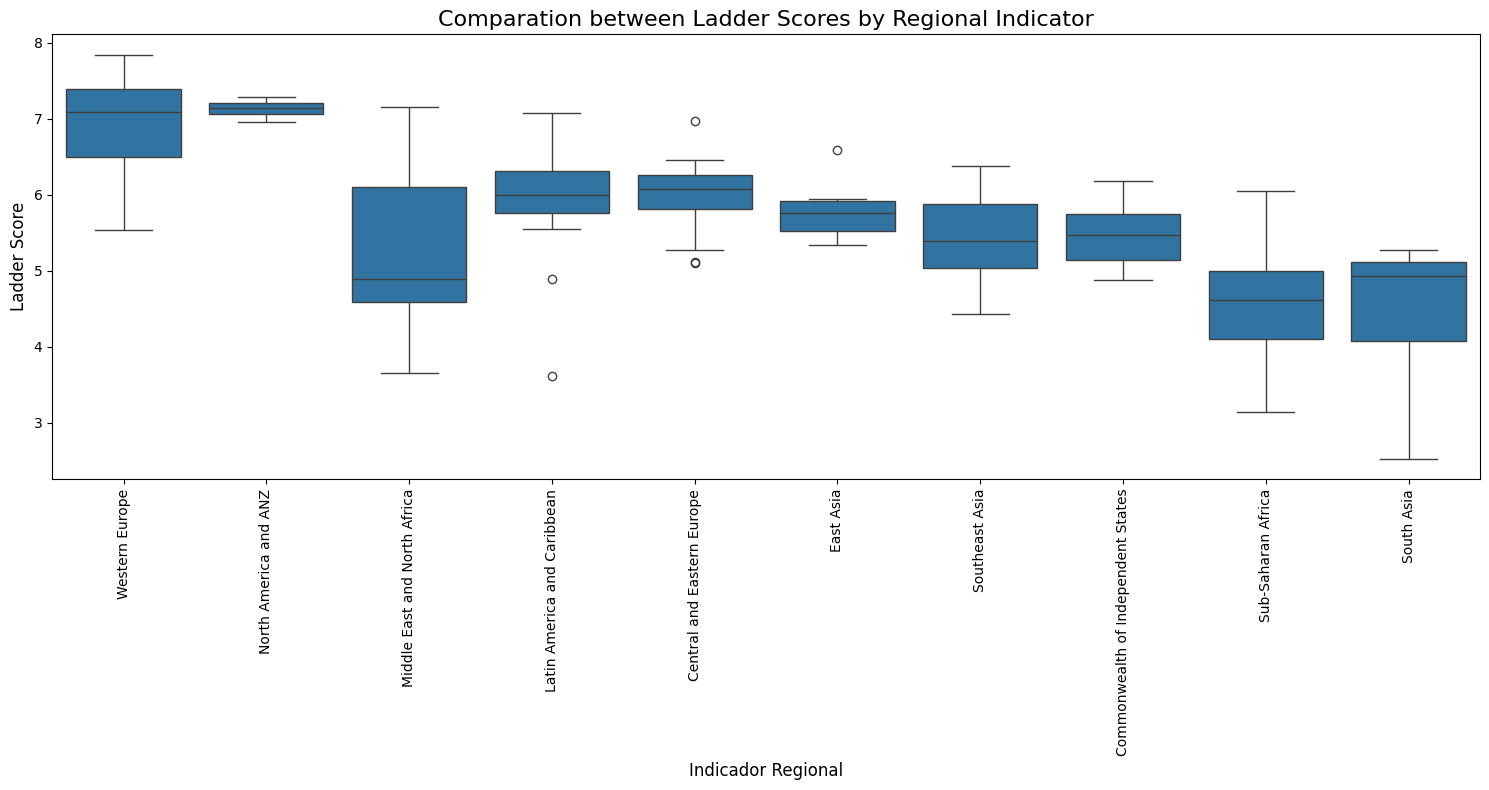

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Regional indicator', y='Ladder score', data=df_happy)

plt.title('Comparation between Ladder Scores by Regional Indicator', fontsize=16)
plt.xlabel('Indicador Regional', fontsize=12)
plt.ylabel('Ladder Score', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## DATA PREPARATION
This phase involves cleaning, transforming, and integrating the datasets to create a final, analysis-ready dataset. Tasks include handling missing values, standardizing country names, aligning variables, and merging the datasets.



In [ ]:
# Garantir que o df_happy tem a coluna "Country"
df_happy = df_happy.rename(columns={"Country name": "Country"})

# Corrigir nomes de países em df_happy
df_happy["Country"] = df_happy["Country"].replace({
    "Taiwan Province of China": "Taiwan",
    "Hong Kong S.A.R. of China": "Hong Kong"
}).astype(str).str.strip()

# Limpar nomes em df_hours e renomear colunas
df_hours = df_hours.rename(columns={
    "Country Country": "Country",
    "Working hours Per worker (2019)[2]": "Average annual hours per worker"
})
df_hours["Country"] = df_hours["Country"].astype(str).str.strip()

# Merge
df_merged = pd.merge(
    df_happy,
    df_hours,
    on="Country",
    how="inner"
)

print(df_merged.head())
print(df_merged.shape)




       Country Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878  

In [ ]:
# garantir nomes consistentes
df_hours = df_hours.rename(columns={
    "Country Country": "Country",
    "Working hours Per worker (2019)[2]": "Average annual hours per worker"
})

# limpar nomes
df_happy["Country"] = df_happy["Country"].astype(str).str.strip()
df_hours["Country"] = df_hours["Country"].astype(str).str.strip()

# merge simples
df_merged = pd.merge(
    df_happy,
    df_hours,
    on="Country",
    how="inner"
)

# checks rápidos
print("Rows in df_happy:", df_happy.shape[0])
print("Rows in df_hours:", df_hours.shape[0])
print("Rows after merge:", df_merged.shape[0])

print(df_merged[["Country", "Ladder score", "Average annual hours per worker"]].head())

print("Unique countries after merge:", df_merged["Country"].nunique())



Rows in df_happy: 149
Rows in df_hours: 67
Rows after merge: 67
       Country  Ladder score  Average annual hours per worker
0      Finland         7.842                           1591.0
1      Denmark         7.620                           1381.0
2  Switzerland         7.571                           1557.0
3      Iceland         7.554                           1454.0
4  Netherlands         7.464                           1440.0
Unique countries after merge: 67


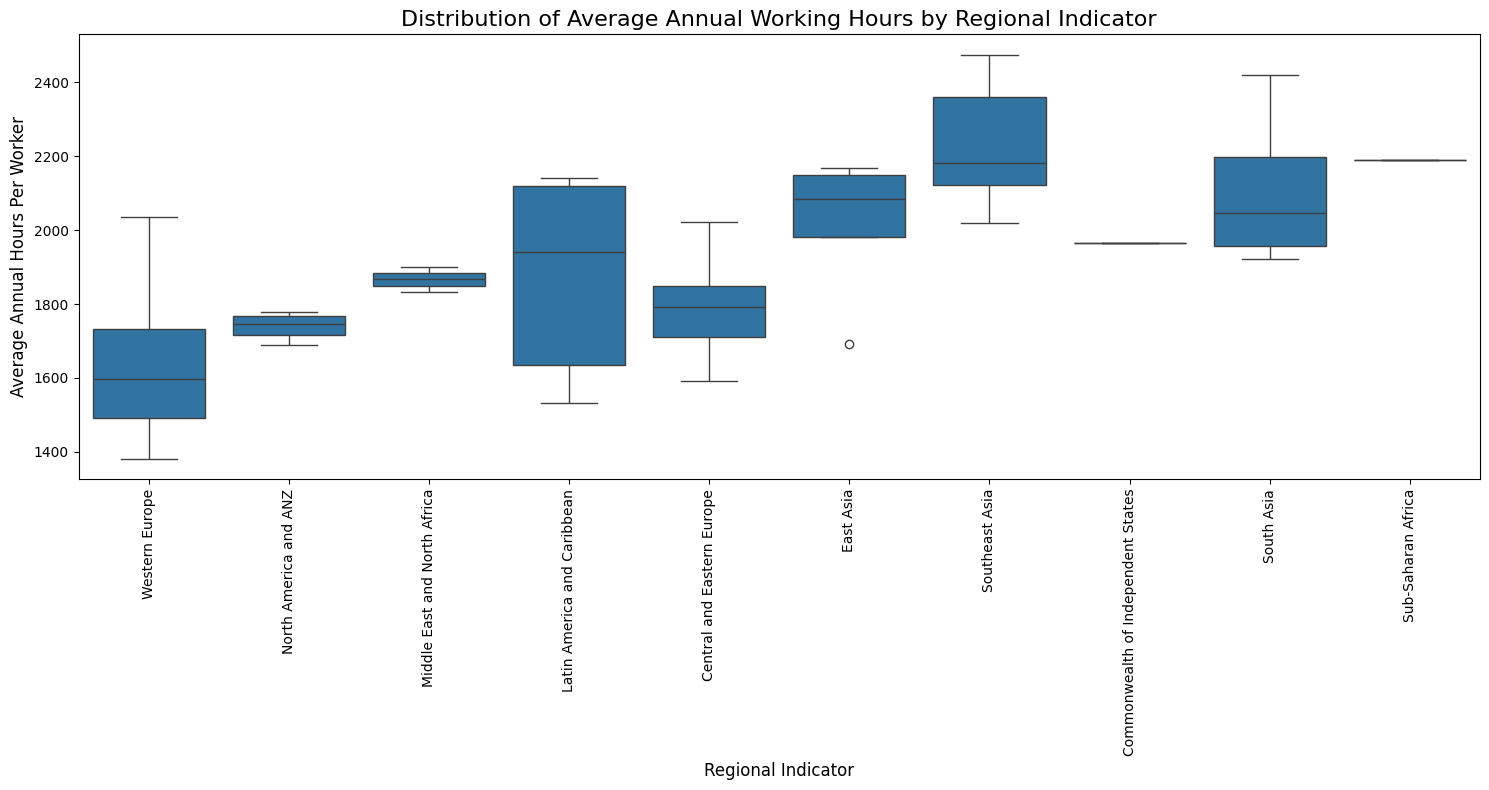

In [ ]:

plt.figure(figsize=(15, 8))
sns.boxplot(x='Regional indicator', y='Average annual hours per worker', data=df_merged)

plt.title('Distribution of Average Annual Working Hours by Regional Indicator', fontsize=16)
plt.xlabel('Regional Indicator', fontsize=12)
plt.ylabel('Average Annual Hours Per Worker', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


This box plot visualizes the distribution of 'Average annual hours per worker' for each 'Regional indicator'.

 Regions like Southeast Asia, Latin America and Caribbean, and Sub-Saharan Africa tend to have a higher median of annual working hours, with some countries reporting hours significantly above the global average.

 We can identify some countries (represented by individual points) that stand out as having atypically high or low annual working hours within their respective regions.

In [ ]:
mean_ladder = df_merged['Ladder score'].mean()
std_ladder = df_merged['Ladder score'].std()

mean_hours = df_merged['Average annual hours per worker'].mean()
std_hours = df_merged['Average annual hours per worker'].std()

print(f"Mean Ladder Score: {mean_ladder:.2f}, Std Dev Ladder Score: {std_ladder:.2f}")
print(f"Mean Average Annual Hours: {mean_hours:.2f}, Std Dev Average Annual Hours: {std_hours:.2f}")

Mean Ladder Score: 6.20, Std Dev Ladder Score: 0.90
Mean Average Annual Hours: 1849.98, Std Dev Average Annual Hours: 269.22


In [ ]:
threshold_ladder = mean_ladder + 2 * std_ladder
threshold_hours = mean_hours + 2 * std_hours

print(f"Outlier Threshold for Ladder Score (Mean + 2*Std Dev): {threshold_ladder:.2f}")
print(f"Outlier Threshold for Average Annual Hours (Mean + 2*Std Dev): {threshold_hours:.2f}")

outlier_countries = df_merged[
    (df_merged['Ladder score'] > threshold_ladder) &
    (df_merged['Average annual hours per worker'] > threshold_hours)
]

print("\nCountries identified as outliers (High Happiness AND High Working Hours):")
if not outlier_countries.empty:
    print(outlier_countries[['Country', 'Ladder score', 'Average annual hours per worker', 'Regional indicator', 'Logged GDP per capita', 'Freedom to make life choices', 'Perceptions of corruption']])
else:
    print("No countries met the outlier criteria.")

Outlier Threshold for Ladder Score (Mean + 2*Std Dev): 8.00
Outlier Threshold for Average Annual Hours (Mean + 2*Std Dev): 2388.43

Countries identified as outliers (High Happiness AND High Working Hours):
No countries met the outlier criteria.


In [ ]:
outlier_countries_revised = df_merged[
    (df_merged['Ladder score'] > mean_ladder) &
    (df_merged['Average annual hours per worker'] > mean_hours)
]

print("\nCountries identified as outliers (High Happiness AND High Working Hours - both above average):")
if not outlier_countries_revised.empty:
    print(outlier_countries_revised[['Country', 'Ladder score', 'Average annual hours per worker', 'Regional indicator', 'Logged GDP per capita', 'Freedom to make life choices', 'Perceptions of corruption']])
else:
    print("No countries met the revised outlier criteria.")


Countries identified as outliers (High Happiness AND High Working Hours - both above average):
       Country  Ladder score  Average annual hours per worker  \
11      Israel         7.157                           1901.0   
15  Costa Rica         7.069                           2069.0   
21       Malta         6.602                           1915.0   
22      Taiwan         6.584                           2085.0   
27   Singapore         6.377                           2330.0   
30      Mexico         6.317                           2137.0   
31   Lithuania         6.255                           1886.0   

              Regional indicator  Logged GDP per capita  \
11  Middle East and North Africa                 10.575   
15   Latin America and Caribbean                  9.880   
21                Western Europe                 10.674   
22                     East Asia                 10.871   
27                Southeast Asia                 11.488   
30   Latin America and Caribb

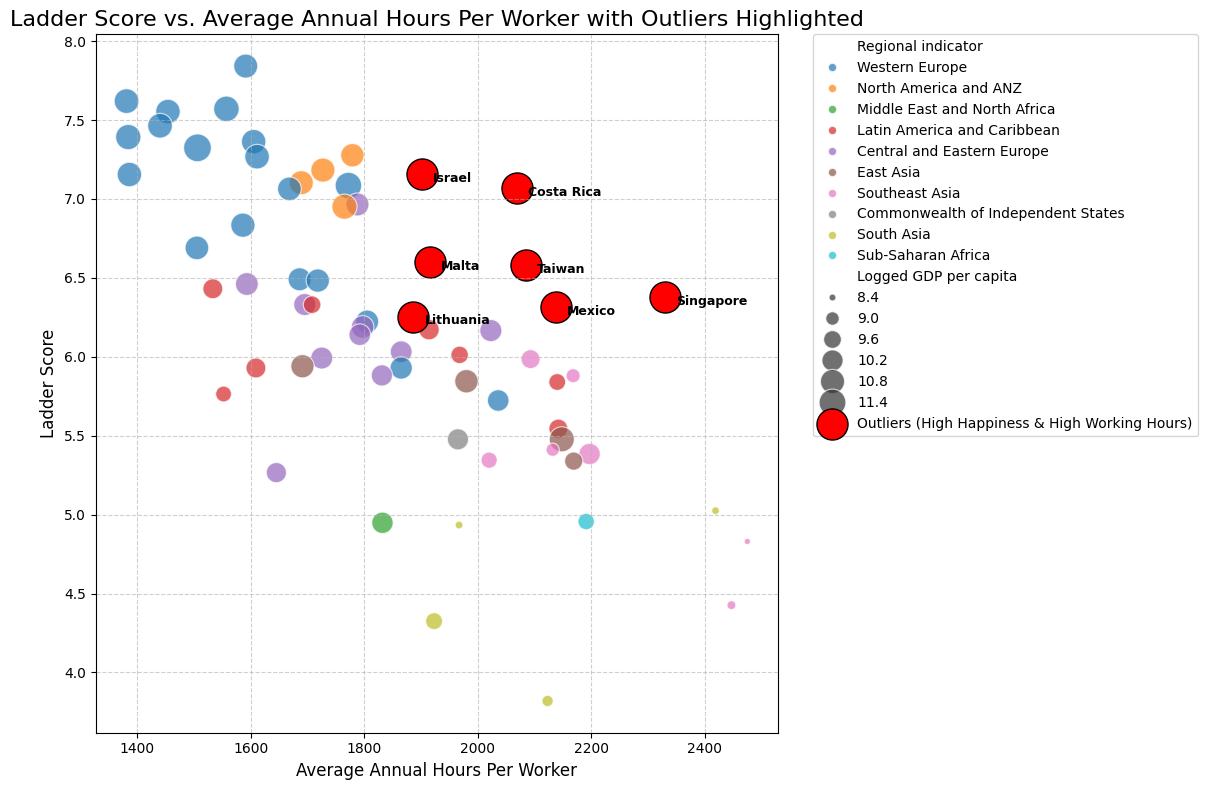

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_merged,
    x='Average annual hours per worker',
    y='Ladder score',
    hue='Regional indicator',
    size='Logged GDP per capita',
    sizes=(20, 400),
    alpha=0.7
)

if not outlier_countries_revised.empty:
    plt.scatter(
        outlier_countries_revised['Average annual hours per worker'],
        outlier_countries_revised['Ladder score'],
        color='red',
        s=500,
        edgecolor='black',
        label='Outliers (High Happiness & High Working Hours)'
    )
    for i, row in outlier_countries_revised.iterrows():
        plt.text(
            row['Average annual hours per worker'] + 20,
            row['Ladder score'] - 0.05,
            row['Country'],
            fontsize=9,
            fontweight='bold'
        )

plt.title('Ladder Score vs. Average Annual Hours Per Worker with Outliers Highlighted', fontsize=16)
plt.xlabel('Average Annual Hours Per Worker', fontsize=12)
plt.ylabel('Ladder Score', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

in our analysis, we found a negative correlation between work hours and happiness: generally, the more people work, the lower their life satisfaction. You can see this clearly with the Western European countries in the top-left, which work the least and are the happiest.

However, we’ve highlighted several outliers in red, such as Mexico, Costa Rica, and Singapore. These countries are unique because they maintain high happiness scores despite having some of the longest working hours in the world.

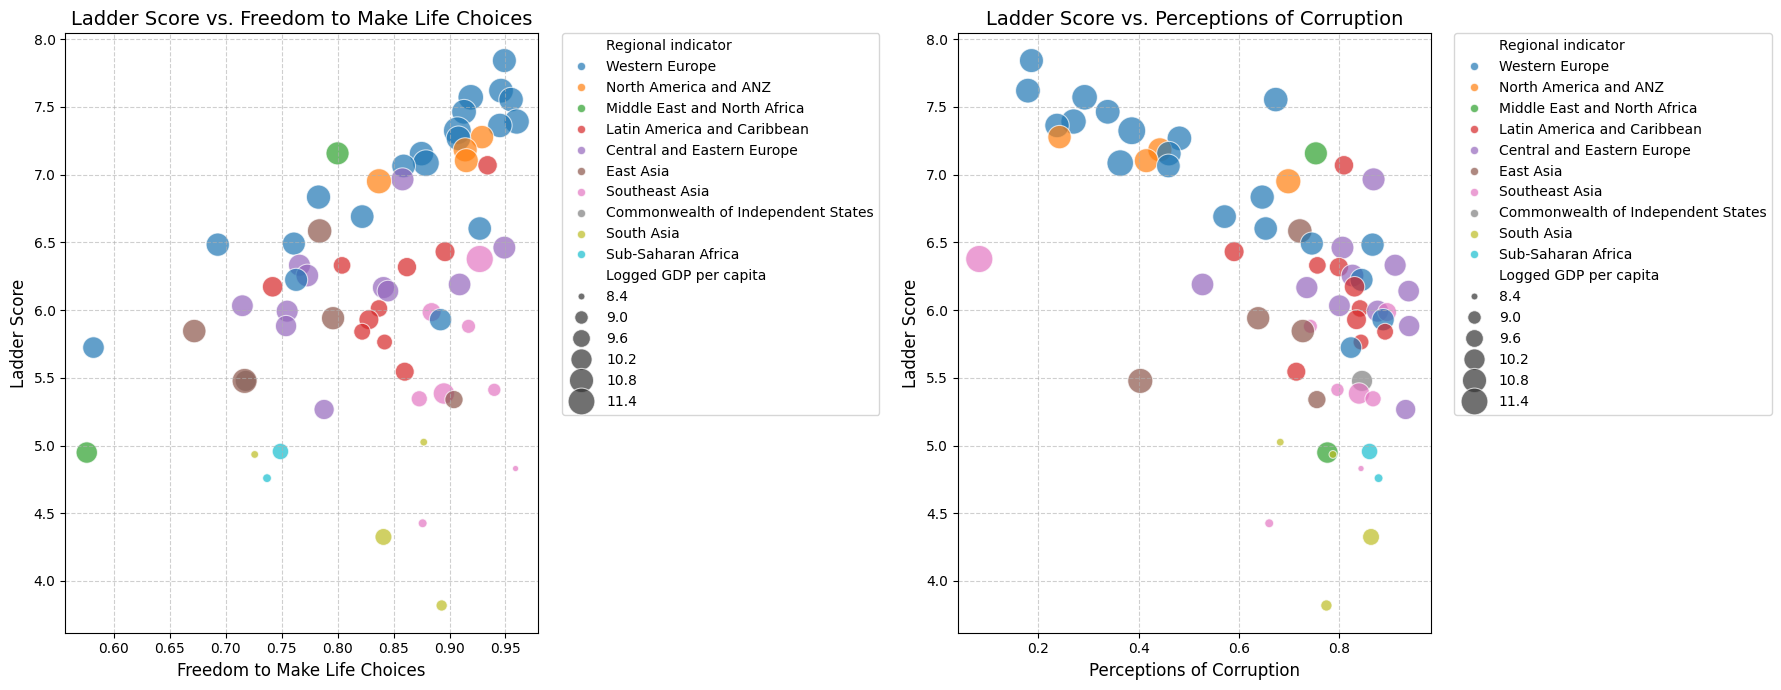

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Freedom to make life choices vs. Ladder score
sns.scatterplot(
    data=df_merged,
    x='Freedom to make life choices',
    y='Ladder score',
    hue='Regional indicator',
    size='Logged GDP per capita',
    sizes=(20, 400),
    alpha=0.7,
    ax=axes[0]
)
axes[0].set_title('Ladder Score vs. Freedom to Make Life Choices', fontsize=14)
axes[0].set_xlabel('Freedom to Make Life Choices', fontsize=12)
axes[0].set_ylabel('Ladder Score', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Plot 2: Perceptions of corruption vs. Ladder score
sns.scatterplot(
    data=df_merged,
    x='Perceptions of corruption',
    y='Ladder score',
    hue='Regional indicator',
    size='Logged GDP per capita',
    sizes=(20, 400),
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_title('Ladder Score vs. Perceptions of Corruption', fontsize=14)
axes[1].set_xlabel('Perceptions of Corruption', fontsize=12)
axes[1].set_ylabel('Ladder Score', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

In our group's analysis of these two charts, we observed how institutional and social factors influence global happiness:

Positive Correlation with Freedom: The first chart shows that as the Freedom to Make Life Choices increases, the Ladder Score (happiness) generally rises. Western European and North American countries (blue and orange) are concentrated in the top-right, showing high freedom and high happiness.

Negative Correlation with Corruption: The second chart illustrates that higher Perceptions of Corruption are typically associated with lower happiness scores. Most of the happiest nations are clustered on the left side of the graph, where corruption is perceived to be much lower.

The Role of Wealth: In both graphs, the larger circles indicate a higher GDP per capita, showing that wealthier nations often have more freedom, lower perceived corruption, and higher overall life satisfaction.

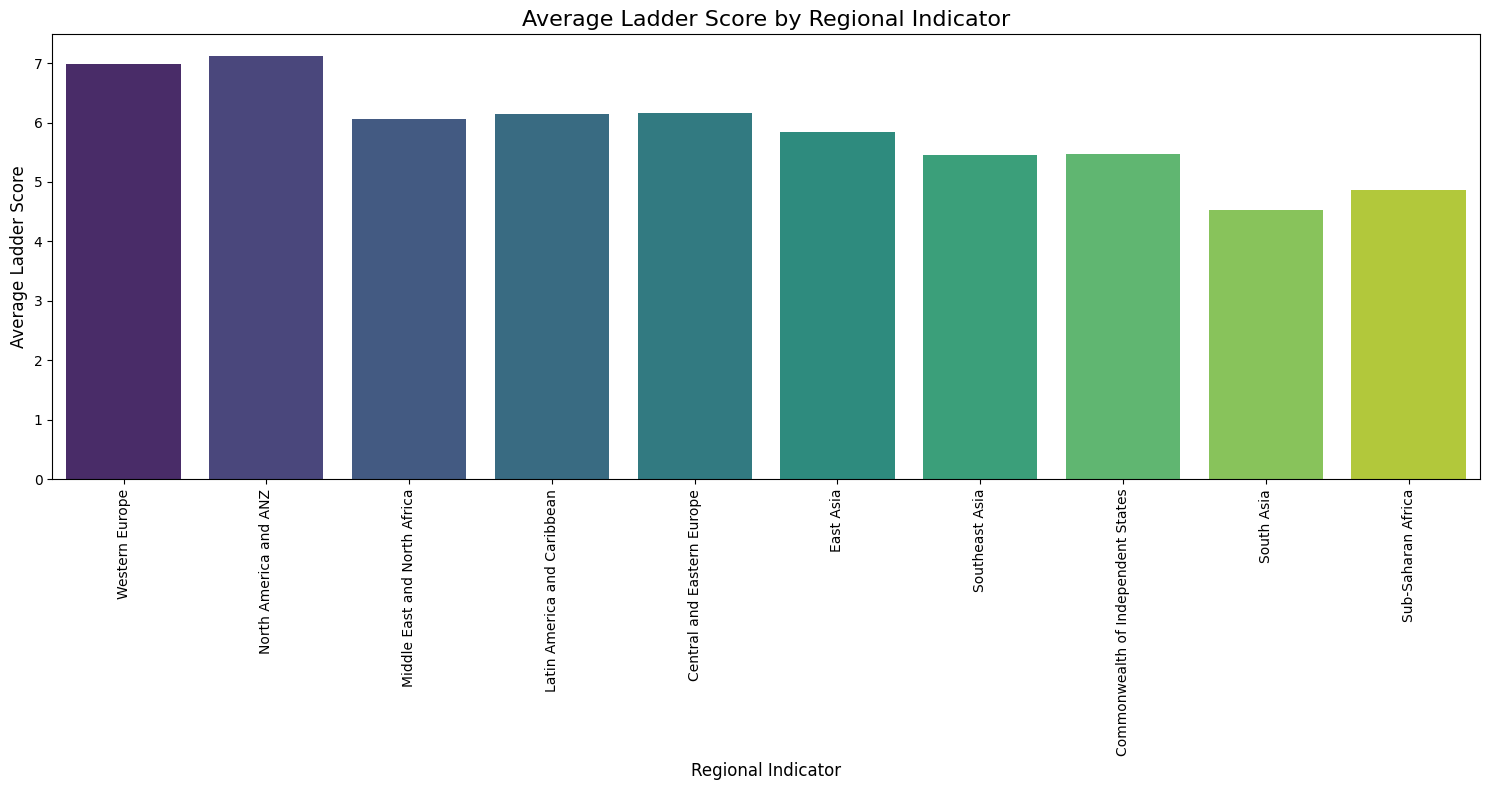

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Regional indicator', y='Ladder score', data=df_merged, errorbar=None, palette='viridis', hue='Regional indicator', legend=False)
plt.title('Average Ladder Score by Regional Indicator', fontsize=16)
plt.xlabel('Regional Indicator', fontsize=12)
plt.ylabel('Average Ladder Score', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Our bar chart shows that North America and ANZ and Western Europe are the highest-ranking regions globally, with average Ladder Scores reaching or exceeding 7.0.

Conversely, regions like South Asia and Sub-Saharan Africa report the lowest average happiness, which aligns with their positions on the scatter plots showing lower freedom and higher corruption levels.

## MODELING
During the modeling phase, appropriate analytical methods are applied to address the research questions. In this project, this includes descriptive statistics, correlation analysis, and simple regression models to explore relationships between variables.


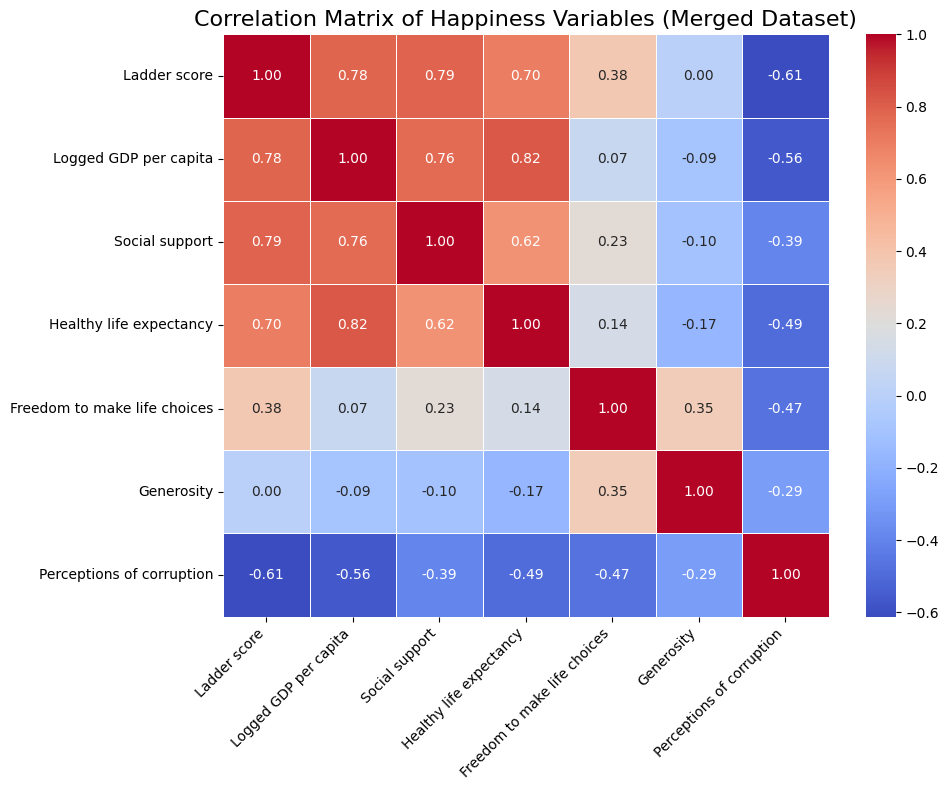

In [ ]:
correlation_columns = [
    'Ladder score',
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Correlation matrix using the merged dataset dataset

correlation_matrix = df_merged[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Matrix of Happiness Variables (Merged Dataset)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The correlation matrix was created to quantify how strongly key economic, social, and institutional variables move together with the happiness ladder score and with each other in the merged dataset. This helps identify which factors are most promising to include in further modelling steps (e.g., regression) and where multicollinearity might be an issue


From this matrix, the group can conclude that structural conditions (income, social support, health) are the dominant correlates of happiness, while Freedom to make life choices and Perceptions of corruption play a secondary but still meaningful role, and Generosity adds little explanatory power, which justifies focusing on the former variables in the formal hypothesis tests and predictive models.


Hypothesis testing:



## RQ1-Do countries with shorter average working hours rank higher in the World Happiness Report?

For the first research question—whether countries with shorter working hours rank higher in the World Happiness Report—the analysis combines the merged dataset (happiness plus working hours) with descriptive statistics and correlation/regression to check if Average annual hours per worker is negatively related to Ladder score

In [ ]:
# Create a clean dataset containing only the columns from RQ1.
subset_rq1 = df_merged[["Country",
                        "Average annual hours per worker",
                        "Ladder score"]].dropna()

print("Dimensão após remover missing:", subset_rq1.shape)
print(subset_rq1.head())


Dimensão após remover missing: (66, 3)
       Country  Average annual hours per worker  Ladder score
0      Finland                           1591.0         7.842
1      Denmark                           1381.0         7.620
2  Switzerland                           1557.0         7.571
3      Iceland                           1454.0         7.554
4  Netherlands                           1440.0         7.464


We can see that we lost a Country in our new subdataset, thats because Nigeria had a Na in the Working Hours

In [ ]:
from scipy.stats import pearsonr
import statsmodels.api as sm

x = subset_rq1["Average annual hours per worker"]
y = subset_rq1["Ladder score"]

# Correlation
r, p = pearsonr(x, y)
print("Pearson r:", r)
print("p-value:", p)

# Simple linear regression
X = sm.add_constant(x)
model_h1 = sm.OLS(y, X).fit()
print(model_h1.summary())


Pearson r: -0.6802153034094842
p-value: 3.3441832797619947e-10
                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     55.11
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           3.34e-10
Time:                        19:42:09   Log-Likelihood:                -64.870
No. Observations:                  66   AIC:                             133.7
Df Residuals:                      64   BIC:                             138.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In this step, the analysis focuses on the relationship between national happiness and average annual working hours by first computing the Pearson correlation and then fitting a simple linear regression model with Ladder score as the dependent variable and Average annual hours per worker as the only predictor. This directly targets the research question of whether countries that work longer hours tend to report lower happiness levels, using both a correlation coefficient and an OLS regression to quantify the association




The Pearson correlation of approximately −0.68 with an extremely small p‑value indicates a strong and statistically significant negative linear relationship: as average annual working hours increase, happiness scores tend to decrease. The regression confirms this pattern: the coefficient for Average annual hours per worker is negative and highly significant, and the model explains about 46% of the variance in Ladder score (R‑squared ≈ 0.463), suggesting that working time alone is a substantial predictor of cross‑country differences in reported well‑being, while still leaving room for other factors captured in later models

# RQ2

In [ ]:
import statsmodels.api as sm

cols_rq2 = [
    "Ladder score",
    "Average annual hours per worker",
    "Logged GDP per capita"
]

subset_rq2 = df_merged[cols_rq2].dropna()
print(subset_rq2.shape)
subset_rq2.head()

X = subset_rq2[["Logged GDP per capita",
                "Average annual hours per worker"]]
y = subset_rq2["Ladder score"]

X = sm.add_constant(X)
model_h2 = sm.OLS(y, X).fit()
print(model_h2.summary())



(66, 3)
                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     62.21
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           1.22e-15
Time:                        19:42:09   Log-Likelihood:                -49.393
No. Observations:                  66   AIC:                             104.8
Df Residuals:                      63   BIC:                             111.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
co

In this step, the analysis extends the previous simple model by adding Logged GDP per capita as a control variable to examine whether average annual working hours still matter for happiness once economic prosperity is taken into account

The results show a high R‑squared of about 0.664, meaning that together GDP and working hours explain roughly two‑thirds of the variance in national happiness scores, with GDP having a strong positive and highly significant coefficient and working hours retaining a small but negative and statistically significant effect. This indicates that richer countries are generally happier

In [ ]:
cols_rq4 = [
    "Ladder score",
    "Healthy life expectancy",
    "Average annual hours per worker"
]

subset_rq4 = df_merged[cols_rq4].dropna()
print(subset_rq4.shape)
subset_rq4.head()


(66, 3)


,Ladder score,Healthy life expectancy,Average annual hours per worker
0,7.842,72.0,1591.0
1,7.620,72.7,1381.0
2,7.571,74.4,1557.0
3,7.554,73.0,1454.0
4,7.464,72.4,1440.0


In [ ]:
from scipy.stats import pearsonr

y = subset_rq4["Ladder score"]

r_life, p_life = pearsonr(subset_rq4["Healthy life expectancy"], y)
r_hours, p_hours = pearsonr(subset_rq4["Average annual hours per worker"], y)

print("corr(Life expectancy, Ladder):", r_life, "p:", p_life)
print("corr(Working hours, Ladder):", r_hours, "p:", p_hours)


corr(Life expectancy, Ladder): 0.702065159370175 p: 5.097572065633176e-11
corr(Working hours, Ladder): -0.6802153034094842 p: 3.3441832797619947e-10


In [ ]:
import statsmodels.api as sm

X = subset_rq4[["Healthy life expectancy",
                "Average annual hours per worker"]]
y = subset_rq4["Ladder score"]

X = sm.add_constant(X)
model_h4 = sm.OLS(y, X).fit()
print(model_h4.summary())


                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     53.79
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           2.36e-14
Time:                        19:42:09   Log-Likelihood:                -52.499
No. Observations:                  66   AIC:                             111.0
Df Residuals:                      63   BIC:                             117.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
from sklearn.model_selection import train_test_split

features = [
    "Average annual hours per worker",
    "Logged GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Perceptions of corruption"
]

data_model = df_merged[features + ["Ladder score"]].dropna()
X = data_model[features]
y = data_model["Ladder score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def eval_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> RMSE: {rmse:.3f}, R²: {r2:.3f}")

eval_model("Linear Regression", y_test, y_pred_lin)
eval_model("Random Forest", y_test, y_pred_rf)


Linear Regression -> RMSE: 0.442, R²: 0.858
Random Forest -> RMSE: 0.544, R²: 0.785


In [ ]:
import pandas as pd

importances = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

print(importances)


Social support                     0.323095
Logged GDP per capita              0.262452
Healthy life expectancy            0.193935
Freedom to make life choices       0.077360
Perceptions of corruption          0.074152
Average annual hours per worker    0.069005
dtype: float64


## EVALUATION
The results are evaluated in relation to the original research questions and project objectives. This step involves interpreting findings, identifying patterns and outliers, and discussing limitations and potential biases.


# Participation

Lourenço - Data Modeling

Teresa - Data Analysis

Renan - Data Analysis

Matilde - Data Modeling

Melvin - Data modeling